In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

pd.options.display.float_format = "{:.2f}".format

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df.shape

(48895, 16)

In [4]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                0.21
last_review                      0.21
host_name                        0.00
name                             0.00
availability_365                 0.00
calculated_host_listings_count   0.00
number_of_reviews                0.00
minimum_nights                   0.00
price                            0.00
room_type                        0.00
longitude                        0.00
latitude                         0.00
neighbourhood                    0.00
neighbourhood_group              0.00
host_id                          0.00
id                               0.00
dtype: float64

In [5]:
#Drop insignificant columns
df.drop(['id', 'host_name'], axis=1, inplace=True)

### Fill missing values by the mean value for numerical variables and fill missing values by the mode value for categorical variables

In [6]:
#Fill missing values in reviews per month
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [7]:
#Fill missing values in last_reviewabs
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'].fillna(method='ffill', inplace=True)

In [8]:
#Fill missing values in name
df['name'].fillna(df['name'].mode()[0], inplace=True)

In [9]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,67620010.65,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,78610967.03,0.05,0.05,240.15,20.51,44.55,1.50,32.95,131.62
min,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,7822033.00,40.69,-73.98,69.00,1.00,1.00,0.28,1.00,0.00
50%,30793816.00,40.72,-73.96,106.00,3.00,5.00,1.22,1.00,45.00
75%,107434423.00,40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


## Data visualization is help us find patterns of data and solve the problem

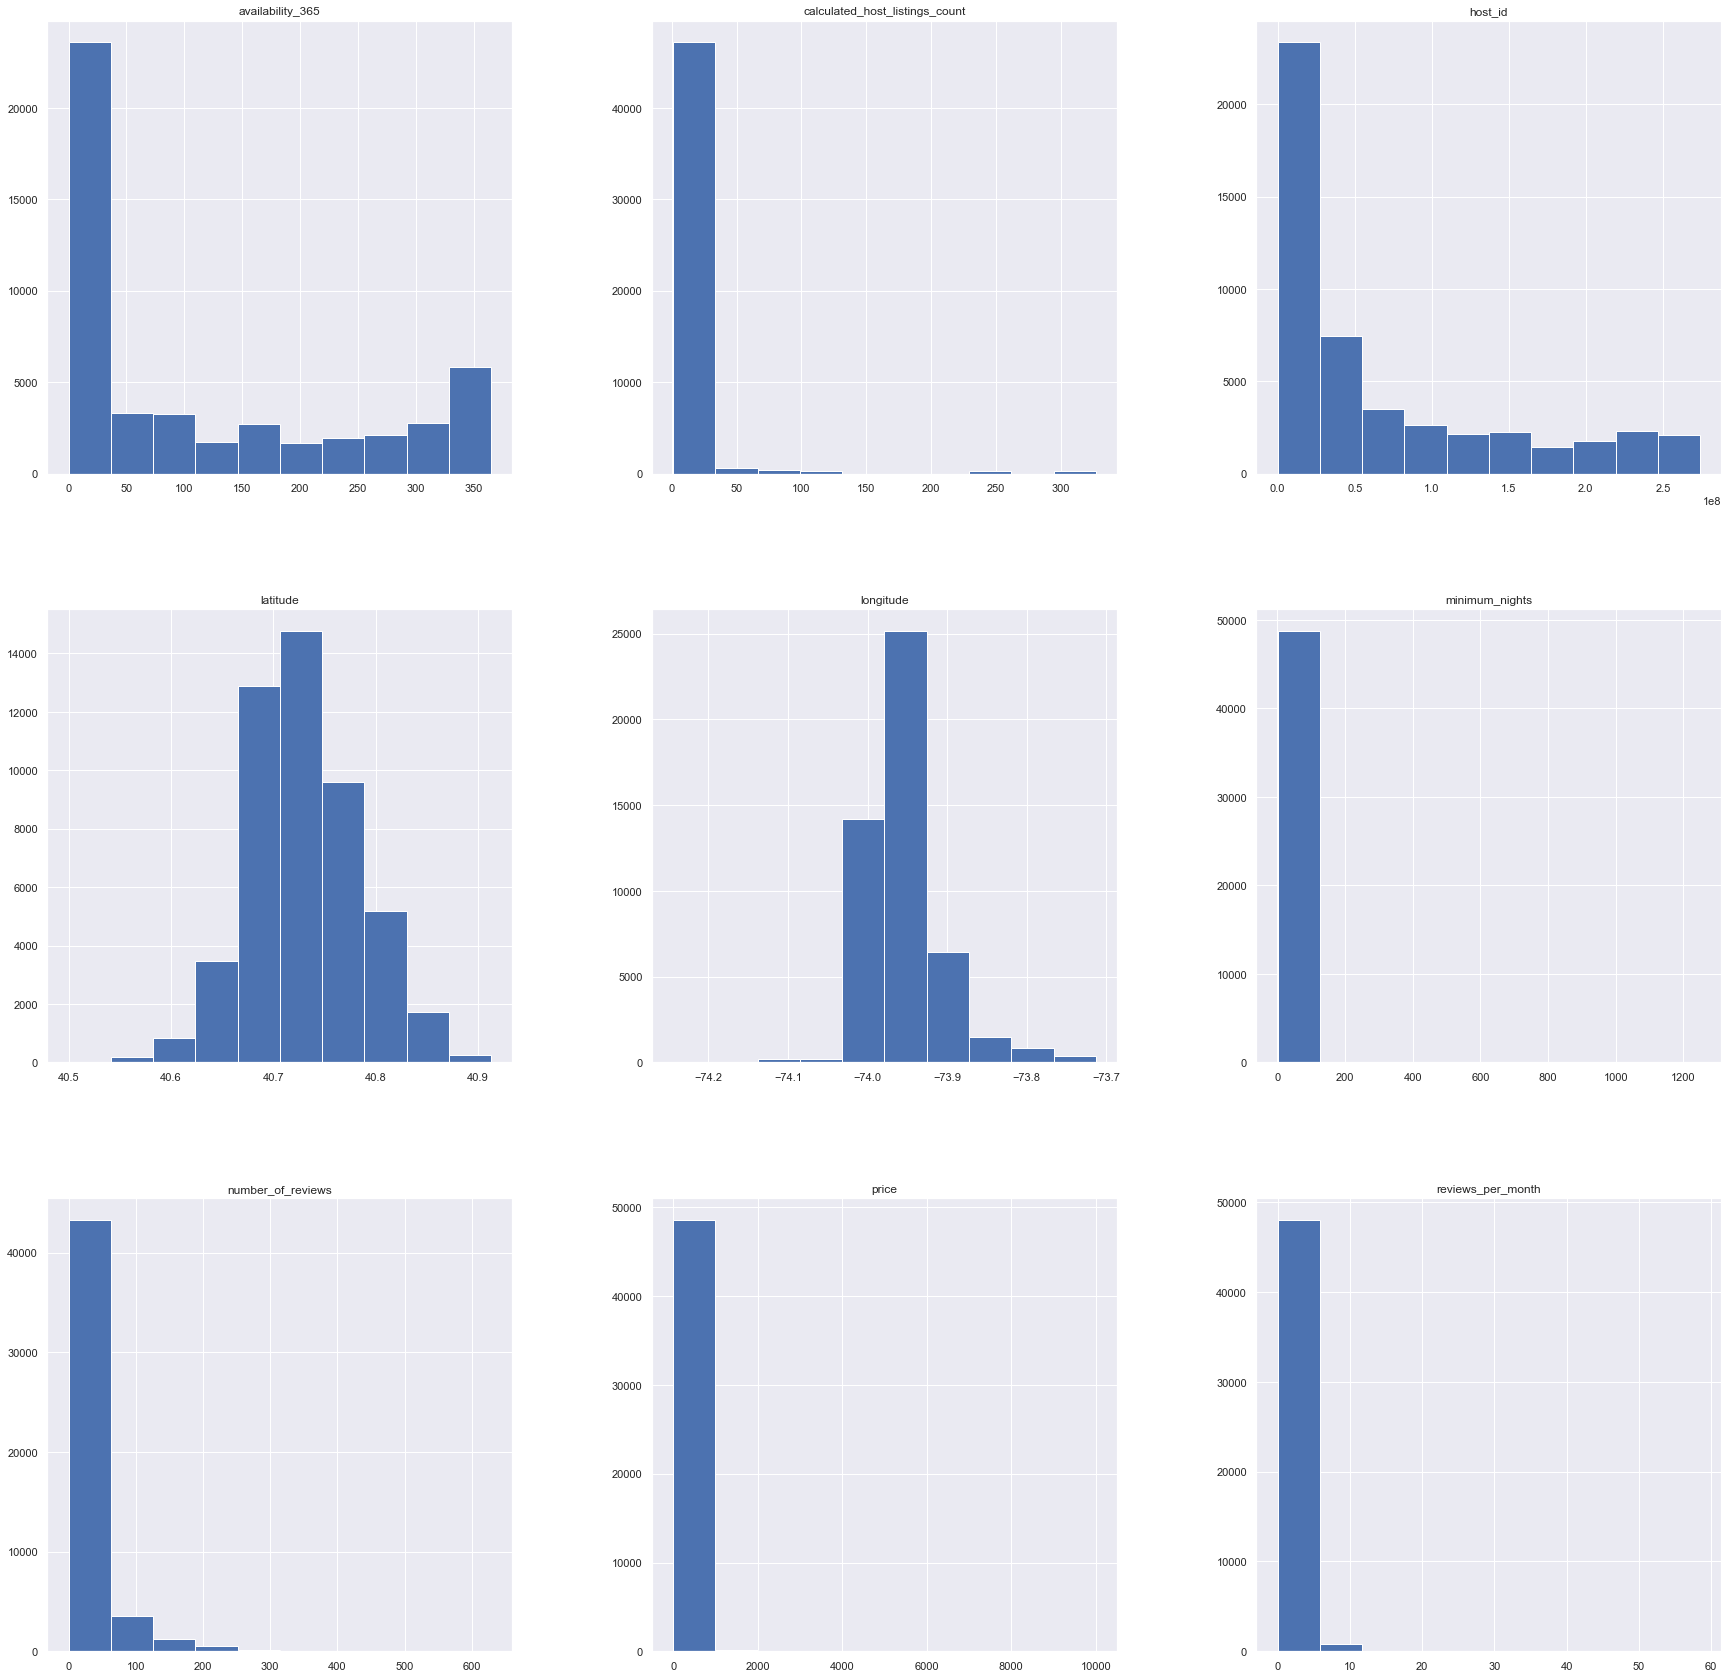

In [10]:
df.hist(figsize=(30, 30));

<Figure size 2160x2160 with 0 Axes>

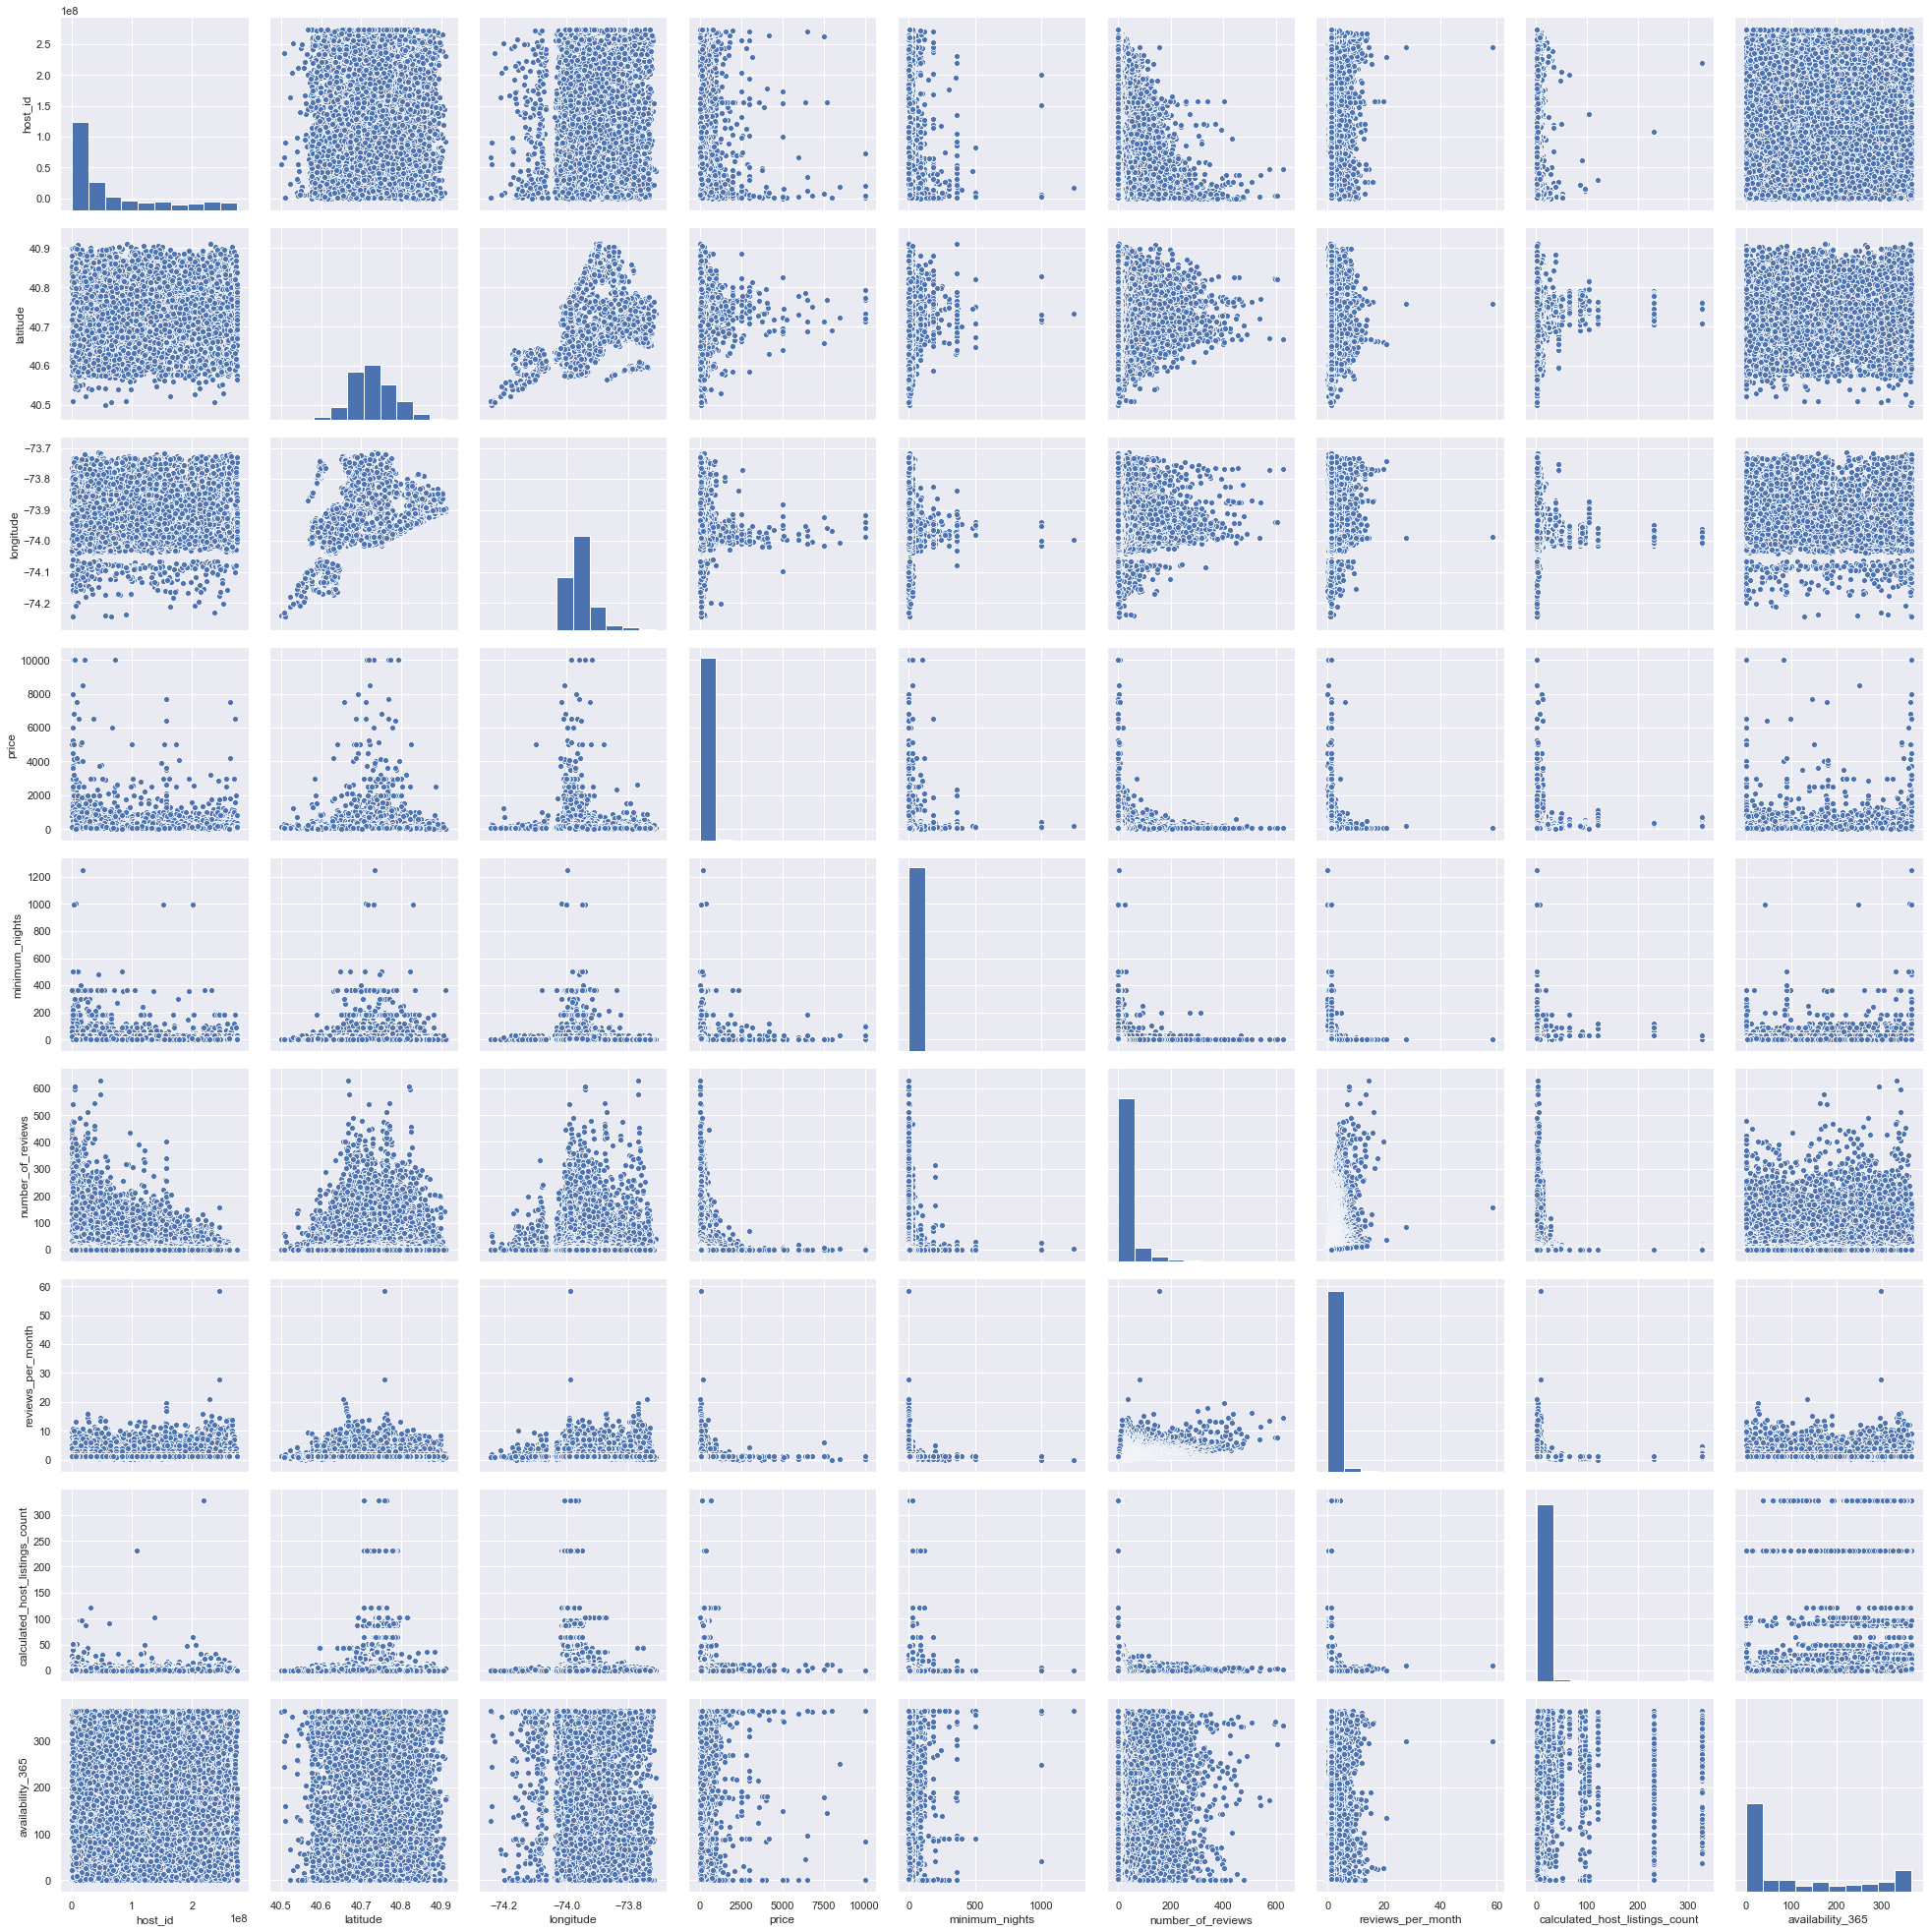

In [12]:
plt.figure(figsize=(30,30))
sns.pairplot(df, height=3, diag_kind='hist');

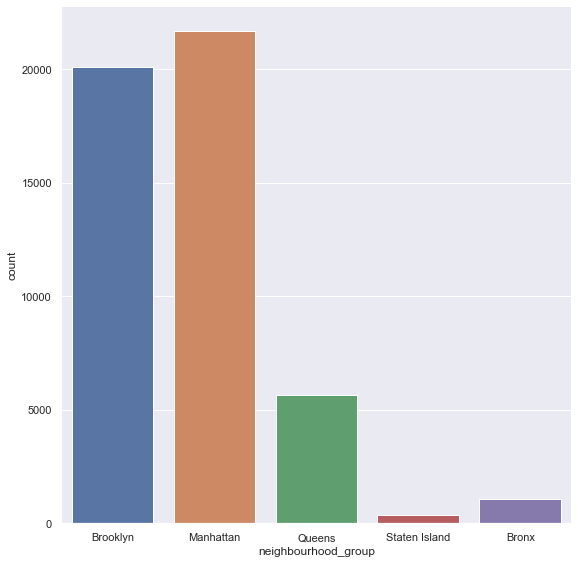

In [15]:
#Neighbourhood group with the most listings
sns.catplot('neighbourhood_group', data=df, kind='count', height=8);

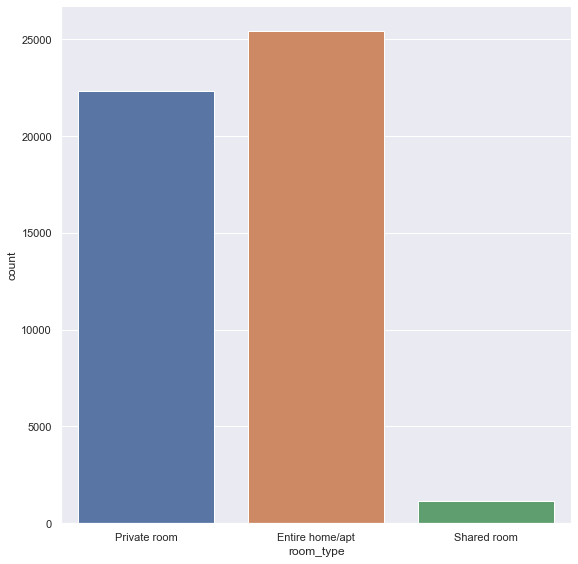

In [17]:
#Room type with the most listings
sns.catplot('room_type', data=df, kind='count', height=8);

Text(0, 0.5, 'Neighbourhood')

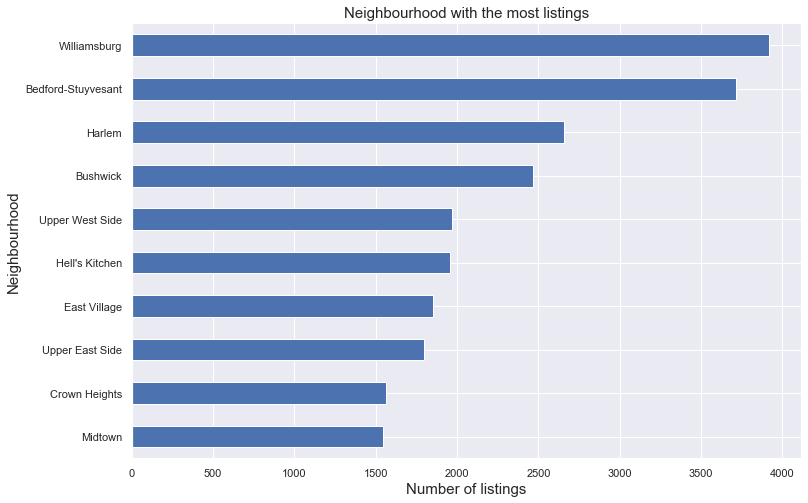

In [32]:
#Neighbourhood with the most listings
top_10 = df['neighbourhood'].value_counts()[:10].sort_values()
top_10.plot(kind='barh', figsize=(12, 8))
plt.title('Neighbourhood with the most listings', fontsize=15)
plt.xlabel('Number of listings', fontsize=15)
plt.ylabel('Neighbourhood', fontsize=15)

In [63]:
#Drop outlier for the price
print(f"Max price ==> {df['price'].max()}")
print(f"Min price ==> {df['price'].min()}")

max_price = df[df['price'] == 10000].index
min_price = df[df['price'] == 0].index

df.drop(max_price, inplace=True)
df.drop(min_price, inplace=True)

Max price ==> 10000
Min price ==> 0


In [65]:
df['price'].quantile(0.99)

795.7999999999884

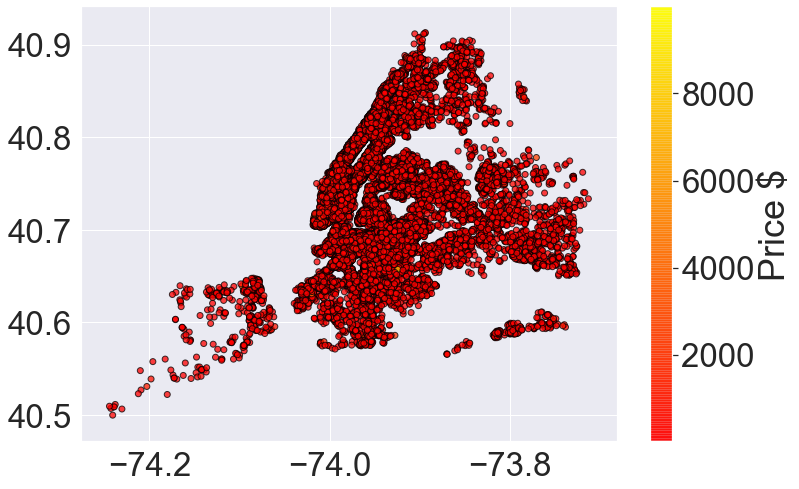

In [64]:
#scatter plot with prices by location
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='autumn', edgecolor='black', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Price $')

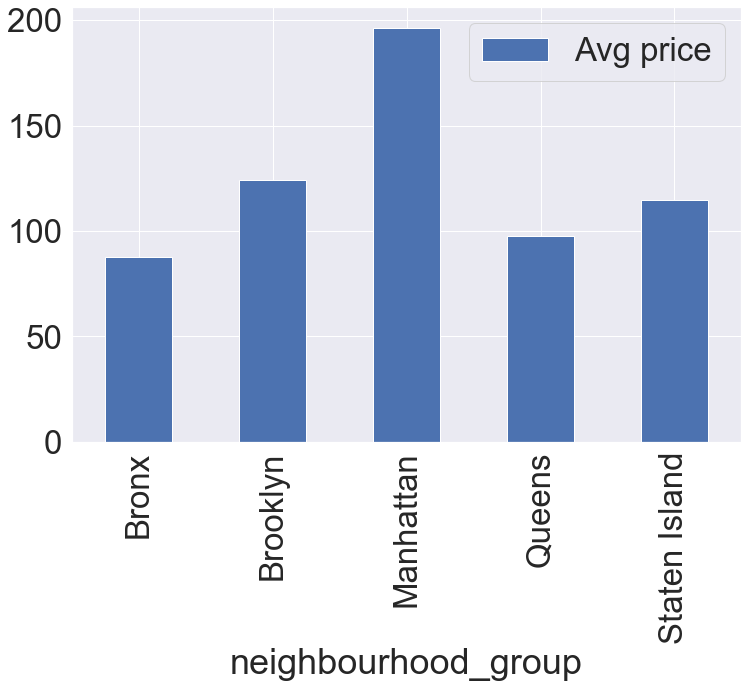

In [78]:
df.groupby(['neighbourhood_group'])['price'].agg([('Avg price', np.mean)]).plot(kind='bar', figsize=(12, 8));

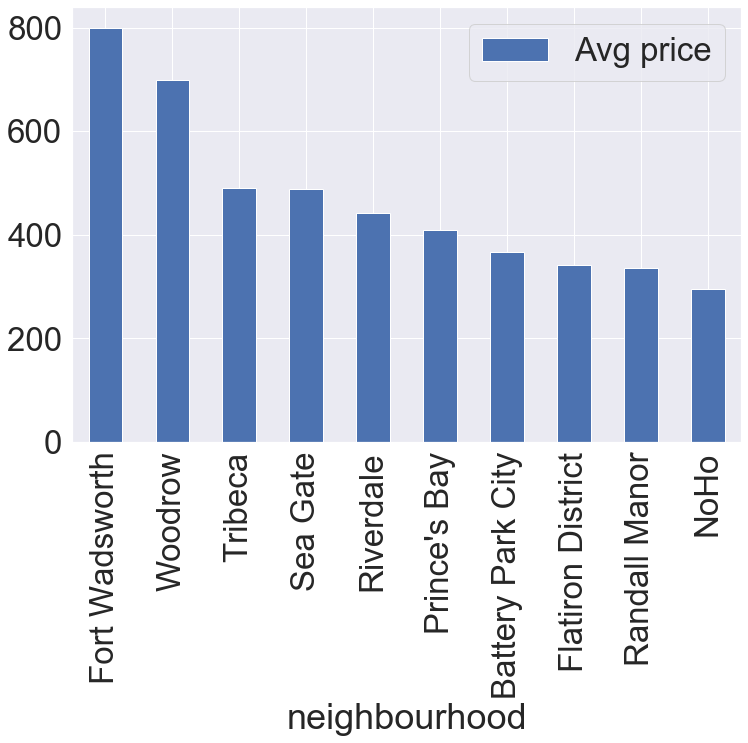

In [84]:
df.groupby('neighbourhood')['price'].agg([('Avg price', np.mean)]).sort_values(by='Avg price', ascending=False)[:10].plot(kind='bar', figsize=(12, 8));

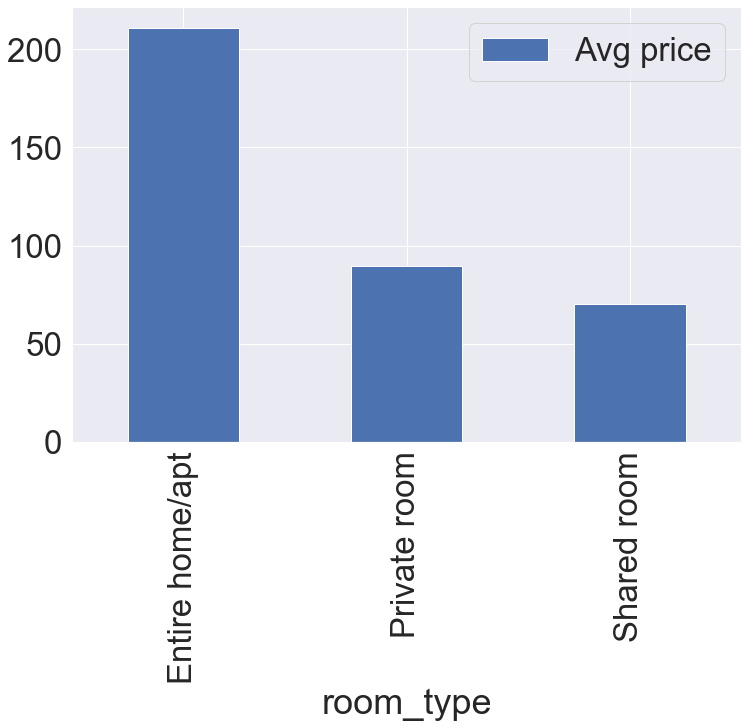

In [108]:
df.groupby('room_type')['price'].agg([('Avg price', np.mean)]).plot(kind='bar', figsize=(12, 8));

## Correlation matrix

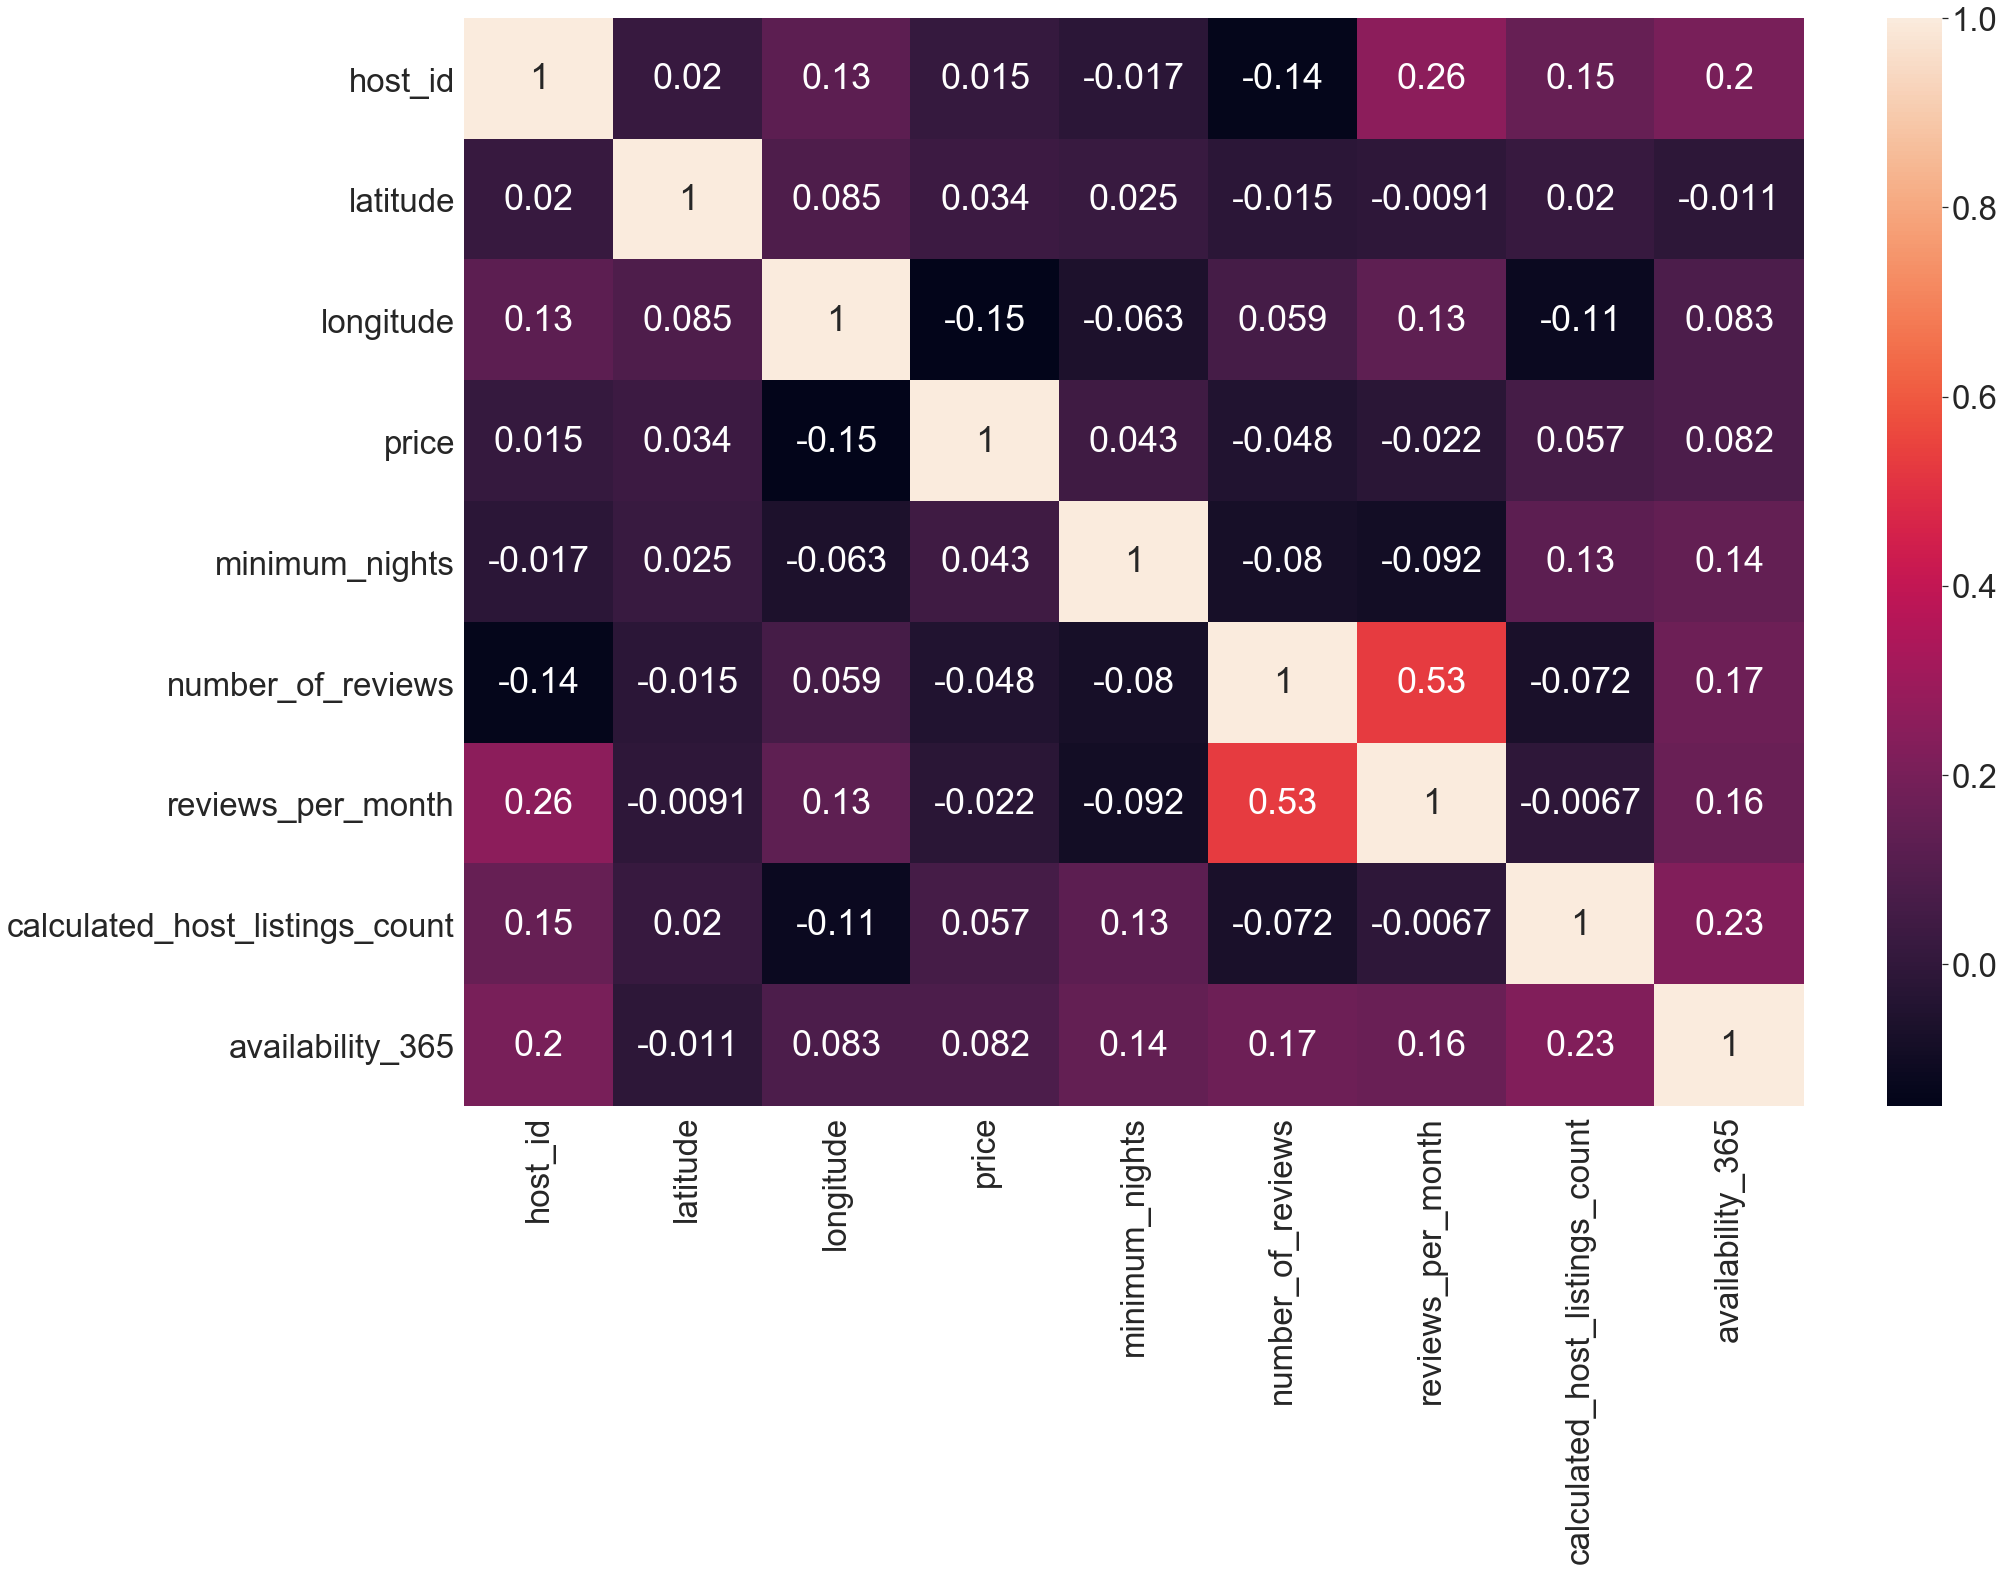

In [40]:
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True);

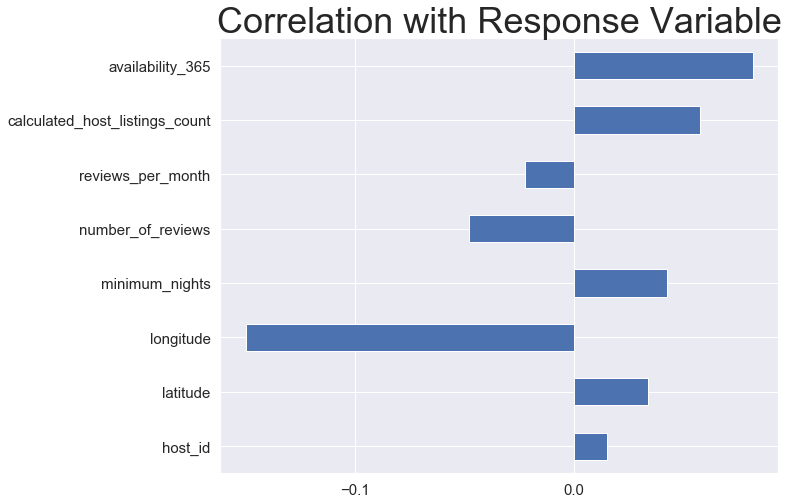

In [43]:
df.drop('price', axis=1).corrwith(df['price']).plot(kind='barh', figsize=(10, 8), 
                                                        title='Correlation with Response Variable',
                                                        fontsize=15, grid=True);

In [55]:
#Get dummies for categorical feature
data = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)
data

,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,2787,Kensington,40.65,-73.97,149,1,9,2018-10-19,0.21,6,365,1,0,0,0,1,0
1,Skylit Midtown Castle,2845,Midtown,40.75,-73.98,225,1,45,2019-05-21,0.38,2,355,0,1,0,0,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Harlem,40.81,-73.94,150,3,0,2019-05-21,1.37,1,365,0,1,0,0,1,0
3,Cozy Entire Floor of Brownstone,4869,Clinton Hill,40.69,-73.96,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,0,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,East Harlem,40.80,-73.94,80,10,9,2018-11-19,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Bedford-Stuyvesant,40.68,-73.95,70,2,0,2019-07-08,1.37,2,9,1,0,0,0,1,0
48891,Affordable room in Bushwick/East Williamsburg,6570630,Bushwick,40.70,-73.93,40,4,0,2019-07-08,1.37,2,36,1,0,0,0,1,0
48892,Sunny Studio at Historical Neighborhood,23492952,Harlem,40.81,-73.95,115,10,0,2019-07-08,1.37,1,27,0,1,0,0,0,0
48893,43rd St. Time Square-cozy single bed,30985759,Hell's Kitchen,40.76,-73.99,55,1,0,2019-07-08,1.37,6,2,0,1,0,0,0,1


## Modeling

In [56]:
from sklearn.model_selection import train_test_split
X = data.drop(['name', 'price', 'last_review', 'neighbourhood'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression(normalize=True)
reg.fit(X, y)

y_test_preds = reg.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
test_score

0.13454559293549329